In [1]:
from manim import *
from manim.utils.color import Colors
import numpy as np
from ipywidgets import Dropdown, HBox, interactive, HTML,Output

config.media_width = "60%"
config.quality = 'low_quality'

WIDTH = config.frame_width
HEIGHT = config.frame_height

PINK = "#EE82EE"
VIOLET = "#4B0082"
mypalette = ["#FF008E", "#D22779", "#612897", "#FF008E", "#0C1E7F"]

ROOT_COLORS_BRIGHT = [RED, GREEN, BLUE, YELLOW, MAROON_B]
ROOT_COLORS_DEEP = ["#440154", "#3b528b", "#21908c", "#5dc963", "#29abca"]
CUBIC_COLORS = [RED_E, TEAL_E, BLUE_E]

MANDELBROT_COLORS = [
    "#00065c",
    "#061e7e",
    "#0c37a0",
    "#205abc",
    "#4287d3",
    "#D9EDE4",
    "#F0F9E4",
    "#BA9F6A",
    "#573706",
]



CFG_output = Output()
CFG_output.layout.height='400px';
CFG_output.layout.overflow='scroll';

COL_output = Output()
COL_output.layout.height='400px';
COL_output.layout.overflow='scroll';

with CFG_output:
    print('CONFIG:')
    for (k,v) in config.items():
        print(f'{k:40}{v}')
    



CFG_output = Output()
CFG_output.layout.height='400px';
CFG_output.layout.overflow='scroll';

COL_output = Output()
COL_output.layout.height='400px';
COL_output.layout.overflow='scroll';

with CFG_output:
    print('CONFIG:')
    for (k,v) in config.items():
        print(f'{k:40}{v}')
    
with COL_output:
    print('COLORS:')
    for c in Colors:
        display(HTML(f'<p style="background-color: {c.value}; text-align:center;">{c.name}</p>'))
    
HBox([CFG_output, COL_output])


Manim Community v0.14.0

In [2]:
 
def get_poslist(m,n,iterations=100):

    x = np.linspace(-2, 1, num=m).reshape((1, m))
    y = np.linspace(-1, 1, num=n).reshape((n, 1))
    C = np.tile(x, (n, 1)) + 1j * np.tile(y, (1, m))

    Z = np.zeros((n, m), dtype=complex)
    M = np.full((n, m), True, dtype=bool)
    for i in range(iterations+1):
        Z[M] = Z[M] * Z[M] + C[M]
        M[np.abs(Z) > 2] = False

    
    return np.uint8(np.flipud(1 - M) * 255) 

def pixelize(pixel_array, W=2**5, H=2**5):
    w,h =  pixel_array.shape[0],  pixel_array.shape[1]
    vg = VGroup(*[Dot(color=rgba_to_color(np.divide(pixel_array[int(x),int(y),:], 255))) for x in np.linspace(0,w,W, endpoint=False) for y in np.linspace(0,h,H, endpoint=False)])

    return vg.arrange_in_grid(buff=0).scale_to_fit_height(HEIGHT)

class Papaj():
    dots = [pixelize(ImageMobject('papaj.png').get_pixel_array(), W=2**n,H=2**n) for n in [0,1,2,3,4,6]]
    
papies=Papaj()

class Star(Polygon):
    """ Develop by friedkeenan"""
    def __init__(self, n=6, *, density=2, outer_radius=1, inner_radius=None, start_angle=None, **kwargs):
        if density <= 0 or density >= n / 2:
            raise ValueError(f"Incompatible density {density}")

        inner_angle = TAU / (2 * n)

        if inner_radius is None:
            # Calculate the inner radius for n and density.
            # See https://math.stackexchange.com/a/2136292

            outer_angle = TAU * density / n

            inverse_x = 1 - np.tan(inner_angle) * ((np.cos(outer_angle) - 1) / np.sin(outer_angle))

            inner_radius = outer_radius / (np.cos(inner_angle) * inverse_x)


        def regular_vertices(n, radius=1, start_angle=None):
            if start_angle is None:
                if n % 2 == 0:
                    start_angle = 0
                else:
                    start_angle = TAU / 4

            start_vector = rotate_vector(RIGHT * radius, start_angle)
            vertices     = compass_directions(n, start_vector)

            return vertices, start_angle

        outer_vertices, self.start_angle = regular_vertices(n, radius=outer_radius, start_angle=start_angle)
        inner_vertices, _                = regular_vertices(n, radius=inner_radius, start_angle=self.start_angle + inner_angle)

        vertices = []
        for pair in zip(outer_vertices, inner_vertices):
            vertices.extend(pair)

        super().__init__(*vertices, **kwargs)
        
def flatten(input_list):
    return [(x/255,y/255,z/255,a/255) for sublist in input_list for (x,y,z,a) in sublist]
def mandelbrot(p):
    an=0
    n=0
    while True:
        yield n, complex_to_R3(an)
        try:
            an = (an**2+R3_to_complex(p))
            n+=1
        except:
#             an = np.nan
            break

    
def deplete(gen):
    while True:
        try:
            n, an = next(gen)
            if n>=256:
                raise ValueError
        except:
            break
    return n

def circInv2d(pos=[0,0,0],circle=Circle()):
    
    x,y,z=pos
    cx, cy, cz = circle.get_center()
    cr = circle.radius
    
    dx = x - cx; dy = y - cy
    d = np.hypot(dx, dy)
    
    if (d!=0):
        dx = dx / d; dy = dy / d
        dnew = cr ** 2.0 / d
        x = float(dnew * dx + cx)
        y = float(dnew * dy + cy)

        return [x,y,z]
    else:
        return [0.0,0.0,0.0]
    
        
a=mandelbrot([.25,0,0])


deplete(a)    

256

In [ ]:
%%manim Mandbelbrot
from datetime import *

class Mandbelbrot(Scene):
    def construct(self):
        rows , cols = 10, 10

        iter_func = lambda z, c: z ** 2 + c
        iter_num = 128
        colors = color_gradient(mypalette, iter_num + 1)

        def get_color(c):
            z = complex(0, 0)
            num = 0
            while abs(z) < 2 and num < iter_num:
                z = iter_func(z, c)
                num += 1
            return colors[num]

        x = np.linspace(-2, 1, num=rows)#.reshape((1, rows))
        y = np.linspace(-1, 0, num=cols)#.reshape((cols, 1))

        mob = Square(stroke_width=0, fill_opacity=1).scale(1/np.sqrt(rows*cols))
        vg=VGroup()
        for p in ([[a,b,0] for a in x for b in y]):
            x,y,z=p
            
            #color=random_bright_color()
            color=get_color(complex(x,y)) 
            
            p1 = mob.copy().set_fill(color=color).move_to(p)
            p2 = p1.copy().move_to(p* np.array([1, -1, 0]))
            vg.add(p1,p2)
            
        vg.scale_to_fit_height(HEIGHT).scale_to_fit_width( WIDTH ).center()
        self.add(vg)
        self.wait()

In [3]:
%%manim MandelScenePOPE2
from IPython.display import clear_output, display


class MandelScenePOPE2(Scene):
    def construct(self):
        
        p0=papies.dots[0]
        self.play(Write(p0))
        for p in papies.dots[1:]:
            self.play(Transform(p0,p.center()), rate_function=linear)

        for _ in range(3+1):
            self.play(p0.animate.apply_function(lambda p: p+np.array([p[0]*p[0]-p[1]*p[1],2*p[0]*p[1],0,])), rate_function=linear)
            self.play(p0.animate.apply_function(circInv2d), rate_function=linear)
        
class MandelScenePOPE(Scene):
    def construct(self):
        lore = ImageMobject('papaj.png')
#         self.add(lore)
#         self.play(FadeIn(lore))
#         self.play(lore.animate.apply_function(lambda p: p+np.array([p[0]*p[0]-p[1]*p[1],2*p[0]*p[1],0,])), rate_function=linear)
        dots = pixelize(lore.get_pixel_array())
        self.play(Create(dots))
        
        for _ in range(3+1):
            self.play(dots.animate.apply_function(lambda p: p+np.array([p[0]*p[0]-p[1]*p[1],2*p[0]*p[1],0,])), rate_function=linear)
            self.play(dots.animate.apply_function(circInv2d), rate_function=linear)
#             self.play(dots.animate.apply_function_to_submobject_positions(circInv2d), rate_function=linear)
#         self.play(dots.animate.scale_to_fit_height(HEIGHT))
        
        self.wait()
#         dots = VGroup(*[Dot(color=rgba_to_color(rgba)) for rgba in flatlist]).arrange_in_grid().center().scale_to_fit_height(HEIGHT)
#         print(len(flatlist))
#         self.wait()


[03/19/22 14:31:42] INFO     Animation 0 : Using cached data (hash :     ]8;id=209454;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=312772;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             3163782288_1755878186_1240453128)

                    INFO     Animation 1 : Using cached data (hash :     ]8;id=163541;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=362436;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_1643493648_1240453128)

                    INFO     Animation 2 : Using cached data (hash :     ]8;id=650232;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=468791;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_3587712820_1240453128)

[03/19/22 14:31:45] INFO     Animation 3 : Partial movie file        ]8;id=185364;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=437551;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\MandelScen                         
                             ePOPE2\2201830969_3145375587_1240453128                         
                             .mp4'

[03/19/22 14:31:46] INFO     Animation 4 : Using cached data (hash :     ]8;id=971890;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=137127;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_3518702334_1240453128)

[03/19/22 14:31:55] INFO     Animation 5 : Using cached data (hash :     ]8;id=317101;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=377538;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_1019264404_1240453128)

[03/19/22 14:32:21] WARNING  It looks like the scene contains a lot of         ]8;id=189328;file://D:\Python39\lib\site-packages\manim\utils\hashing.py\hashing.py]8;;\:]8;id=241892;file://D:\Python39\lib\site-packages\manim\utils\hashing.py#152\152]8;;\
                             sub-mobjects. Caching is sometimes not suited to                
                             handle such large scenes, you might consider                    
                             disabling caching with --disable_caching to                     
                             potentially speed up the rendering process.

                    WARNING  You can disable this warning by setting           ]8;id=400562;file://D:\Python39\lib\site-packages\manim\utils\hashing.py\hashing.py]8;;\:]8;id=280161;file://D:\Python39\lib\site-packages\manim\utils\hashing.py#158\158]8;;\
                             disable_caching_warning to True in your config                  
                             file.

[03/19/22 14:32:22] INFO     Animation 6 : Using cached data (hash :     ]8;id=725085;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=959655;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_931946622_1240453128)

[03/19/22 14:32:53] WARNING  It looks like the scene contains a lot of         ]8;id=688349;file://D:\Python39\lib\site-packages\manim\utils\hashing.py\hashing.py]8;;\:]8;id=71701;file://D:\Python39\lib\site-packages\manim\utils\hashing.py#152\152]8;;\
                             sub-mobjects. Caching is sometimes not suited to                
                             handle such large scenes, you might consider                    
                             disabling caching with --disable_caching to                     
                             potentially speed up the rendering process.

                    WARNING  You can disable this warning by setting           ]8;id=305618;file://D:\Python39\lib\site-packages\manim\utils\hashing.py\hashing.py]8;;\:]8;id=659617;file://D:\Python39\lib\site-packages\manim\utils\hashing.py#158\158]8;;\
                             disable_caching_warning to True in your config                  
                             file.

[03/19/22 14:32:54] INFO     Animation 7 : Using cached data (hash :     ]8;id=355934;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=669120;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_677371313_1240453128)

[03/19/22 14:33:14] WARNING  It looks like the scene contains a lot of         ]8;id=277209;file://D:\Python39\lib\site-packages\manim\utils\hashing.py\hashing.py]8;;\:]8;id=369725;file://D:\Python39\lib\site-packages\manim\utils\hashing.py#152\152]8;;\
                             sub-mobjects. Caching is sometimes not suited to                
                             handle such large scenes, you might consider                    
                             disabling caching with --disable_caching to                     
                             potentially speed up the rendering process.

                    WARNING  You can disable this warning by setting           ]8;id=552003;file://D:\Python39\lib\site-packages\manim\utils\hashing.py\hashing.py]8;;\:]8;id=169591;file://D:\Python39\lib\site-packages\manim\utils\hashing.py#158\158]8;;\
                             disable_caching_warning to True in your config                  
                             file.

[03/19/22 14:33:15] INFO     Animation 8 : Using cached data (hash :     ]8;id=699053;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=102708;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_683119918_1240453128)

[03/19/22 14:33:46] WARNING  It looks like the scene contains a lot of         ]8;id=406406;file://D:\Python39\lib\site-packages\manim\utils\hashing.py\hashing.py]8;;\:]8;id=933396;file://D:\Python39\lib\site-packages\manim\utils\hashing.py#152\152]8;;\
                             sub-mobjects. Caching is sometimes not suited to                
                             handle such large scenes, you might consider                    
                             disabling caching with --disable_caching to                     
                             potentially speed up the rendering process.

                    WARNING  You can disable this warning by setting           ]8;id=607634;file://D:\Python39\lib\site-packages\manim\utils\hashing.py\hashing.py]8;;\:]8;id=95353;file://D:\Python39\lib\site-packages\manim\utils\hashing.py#158\158]8;;\
                             disable_caching_warning to True in your config                  
                             file.

[03/19/22 14:34:02] INFO     Animation 9 : Partial movie file        ]8;id=264941;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=837126;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\MandelScen                         
                             ePOPE2\2201830969_3750551506_1240453128                         
                             .mp4'

[03/19/22 14:34:21] WARNING  It looks like the scene contains a lot of         ]8;id=700450;file://D:\Python39\lib\site-packages\manim\utils\hashing.py\hashing.py]8;;\:]8;id=820783;file://D:\Python39\lib\site-packages\manim\utils\hashing.py#152\152]8;;\
                             sub-mobjects. Caching is sometimes not suited to                
                             handle such large scenes, you might consider                    
                             disabling caching with --disable_caching to                     
                             potentially speed up the rendering process.

                    WARNING  You can disable this warning by setting           ]8;id=464908;file://D:\Python39\lib\site-packages\manim\utils\hashing.py\hashing.py]8;;\:]8;id=294198;file://D:\Python39\lib\site-packages\manim\utils\hashing.py#158\158]8;;\
                             disable_caching_warning to True in your config                  
                             file.

[03/19/22 14:34:39] INFO     Animation 10 : Partial movie file       ]8;id=808986;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=985078;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\MandelScen                         
                             ePOPE2\2201830969_2890581177_1240453128                         
                             .mp4'

[03/19/22 14:35:06] WARNING  It looks like the scene contains a lot of         ]8;id=632405;file://D:\Python39\lib\site-packages\manim\utils\hashing.py\hashing.py]8;;\:]8;id=50184;file://D:\Python39\lib\site-packages\manim\utils\hashing.py#152\152]8;;\
                             sub-mobjects. Caching is sometimes not suited to                
                             handle such large scenes, you might consider                    
                             disabling caching with --disable_caching to                     
                             potentially speed up the rendering process.

                    WARNING  You can disable this warning by setting           ]8;id=350205;file://D:\Python39\lib\site-packages\manim\utils\hashing.py\hashing.py]8;;\:]8;id=552794;file://D:\Python39\lib\site-packages\manim\utils\hashing.py#158\158]8;;\
                             disable_caching_warning to True in your config                  
                             file.

[03/19/22 14:35:21] INFO     Animation 11 : Partial movie file       ]8;id=896502;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=461908;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\MandelScen                         
                             ePOPE2\2201830969_3057282464_1240453128                         
                             .mp4'

[03/19/22 14:35:39] WARNING  It looks like the scene contains a lot of         ]8;id=237872;file://D:\Python39\lib\site-packages\manim\utils\hashing.py\hashing.py]8;;\:]8;id=536211;file://D:\Python39\lib\site-packages\manim\utils\hashing.py#152\152]8;;\
                             sub-mobjects. Caching is sometimes not suited to                
                             handle such large scenes, you might consider                    
                             disabling caching with --disable_caching to                     
                             potentially speed up the rendering process.

                    WARNING  You can disable this warning by setting           ]8;id=114683;file://D:\Python39\lib\site-packages\manim\utils\hashing.py\hashing.py]8;;\:]8;id=543915;file://D:\Python39\lib\site-packages\manim\utils\hashing.py#158\158]8;;\
                             disable_caching_warning to True in your config                  
                             file.

[03/19/22 14:35:56] INFO     Animation 12 : Partial movie file       ]8;id=328082;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=971835;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\MandelScen                         
                             ePOPE2\2201830969_1404622754_1240453128                         
                             .mp4'

[03/19/22 14:36:30] WARNING  It looks like the scene contains a lot of         ]8;id=502829;file://D:\Python39\lib\site-packages\manim\utils\hashing.py\hashing.py]8;;\:]8;id=660326;file://D:\Python39\lib\site-packages\manim\utils\hashing.py#152\152]8;;\
                             sub-mobjects. Caching is sometimes not suited to                
                             handle such large scenes, you might consider                    
                             disabling caching with --disable_caching to                     
                             potentially speed up the rendering process.

                    WARNING  You can disable this warning by setting           ]8;id=758582;file://D:\Python39\lib\site-packages\manim\utils\hashing.py\hashing.py]8;;\:]8;id=97486;file://D:\Python39\lib\site-packages\manim\utils\hashing.py#158\158]8;;\
                             disable_caching_warning to True in your config                  
                             file.

[03/19/22 14:36:48] INFO     Animation 13 : Partial movie file       ]8;id=327754;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=666668;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\MandelScen                         
                             ePOPE2\2201830969_1566610887_1240453128                         
                             .mp4'

                    INFO     Combining to Movie file.                ]8;id=973951;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=52181;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#608\608]8;;\

                    INFO                                             ]8;id=661178;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=528201;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#729\729]8;;\
                             File ready at                                                   
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter                                  
                             notebooks\480p15\MandelScenePOPE2.mp4'

                    INFO     The partial movie directory is full (>  ]8;id=65862;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=241263;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#700\700]8;;\
                             100 files). Therefore, manim has                                
                             removed the 15 oldest file(s). You can                          
                             change this behaviour by changing                               
                             max_files_cached in config.

                    INFO     Rendered MandelScenePOPE2                           ]8;id=252490;file://D:\Python39\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=88299;file://D:\Python39\lib\site-packages\manim\scene\scene.py#237\237]8;;\
                             Played 14 animations

In [ ]:
%%manim MandelScene

class MandelScene(Scene):
    def construct(self):
#         grid = NumberPlane()
        c0=Circle(radius=HEIGHT*.5, color=WHITE)
        
#         grid.prepare_for_nonlinear_transform()

        dots = VGroup(*[Circle(color=WHITE) for _ in range(2**8)]).arrange_in_grid().scale_to_fit_width(8*2) #.scale_to_fit_height(4*2)
        self.play(Create(dots))
        
        for _ in range(8):
            t=Text(f'{_}')
            self.add(t)
            self.play(dots.animate.apply_function(lambda p: p+np.array([p[0]*p[0]-p[1]*p[1],2*p[0]*p[1],0,])), rate_function=linear)
            if(_<2):
                self.play(dots.animate.apply_function(circInv2d), rate_function=linear)
                self.play(dots.animate.apply_function_to_submobject_positions(circInv2d), rate_function=linear)
            self.remove(t)
        self.play(FadeOut(dots))

#             self.play(dots.animate.apply_function(lambda p: p+np.array([p[0]*p[0]-p[1]*p[1],2*p[0]*p[1],0,])), rate_function=linear)

In [105]:
%%manim MandelScene2
import numpy as np
 
def get_poslist(m,n,iterations=100):

    x = np.linspace(-2, 1, num=m).reshape((1, m))
    y = np.linspace(-1, 1, num=n).reshape((n, 1))
    C = np.tile(x, (n, 1)) + 1j * np.tile(y, (1, m))

    Z = np.zeros((n, m), dtype=complex)
    M = np.full((n, m), True, dtype=bool)
    for i in range(iterations+1):
        Z[M] = Z[M] * Z[M] + C[M]
        M[np.abs(Z) > 2] = False

    
    return np.uint8(np.flipud(1 - M) * 255) 

class MandelScene2(Scene):
    def construct(self):
        size = ValueTracker(1)
        m = int(size.get_value())
        
        poslist=get_poslist(m,m)
        vg = VGroup(*[Dot(fill_opacity=item) for sublist in poslist for item in sublist]).arrange_in_grid().center().scale_to_fit_height(5*2)
        
        def vg_updater(mob):
            m = int(size.get_value())
            poslist=get_poslist(m,m,m**2)
            vg = VGroup(*[Dot(fill_opacity=item) for sublist in poslist for item in sublist]).arrange_in_grid().center().scale_to_fit_height(5*2)
            mob.become(vg)
            
        self.add(vg)
        vg.add_updater(vg_updater)
        self.play(size.animate.increment_value(50))
        self.wait()

# for row in np.uint8(np.flipud(1 - M) * 255):
#     [Dot(fill_opacity=cell) for cell in row]

[03/17/22 11:18:08] INFO     Animation 0 : Partial movie file        ]8;id=283432;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=941225;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\MandelScen                         
                             e2\3163782288_295530597_3749642282.mp4'

[03/17/22 11:18:21] INFO     Animation 1 : Partial movie file        ]8;id=198711;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=131720;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\MandelScen                         
                             e2\2201830969_398514950_2524926622.mp4'

                    INFO     Combining to Movie file.                ]8;id=346769;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=949802;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#608\608]8;;\

                    INFO                                             ]8;id=570200;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=739439;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#729\729]8;;\
                             File ready at                                                   
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter                                  
                             notebooks\480p15\MandelScene2.mp4'

                    INFO     Rendered MandelScene2                               ]8;id=562780;file://D:\Python39\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=11262;file://D:\Python39\lib\site-packages\manim\scene\scene.py#237\237]8;;\
                             Played 2 animations

In [30]:
%%manim Procenty

import random
class Procenty(Scene):
    def construct(self):
        
        tort=Circle(3).set_fill(BLUE, opacity=1).set_stroke(opacity=0)
        tort_label = Text(f'100%', color=WHITE).move_to(tort.get_center())
        proc=60
        cut=Sector(outer_radius =3, angle=(proc/100)*2*PI, color=BLUE_E)
        cut_label = Text(f'{proc}%', color=WHITE).move_to(cut.get_center())
#         self.add(tort,cut, cut_label)
        self.play(Create(tort))
        self.play(Write(tort_label))
        self.play(Create(cut), FadeOut(tort_label))
        self.play(Write(cut_label))
        self.wait()
        proc=30
        cut2=Sector(outer_radius =3, angle=(proc/100)*2*PI, color=BLUE_E)
        cut_label2 = Text(f'{proc}%', color=WHITE).move_to(cut2.get_center())
#         self.add(tort,cut, cut_label)
        self.play(Transform(cut_label,cut_label2), Transform(cut,cut2))
        self.wait(5)
        proc=10
        cut3=Sector(outer_radius =3, angle=(proc/100)*2*PI, color=BLUE_E)
        cut_label3 = Text(f'{proc}%', color=WHITE).move_to(cut3.get_center())
#         self.add(tort,cut, cut_label)
        self.play(Transform(cut_label,cut_label3), Transform(cut,cut3))
        self.wait(5)
#         self.wait()        
#         cut.become(Sector(outer_radius =3, angle=(proc/100)*2*PI))
            
#         def randomSquare(vg, dt):
#             index = int(random.random()*len(squares))
#             square = squares[index]
#             square.set_fill(opacity=random.random())
#             square.add_updater(lambda mobject, dt: mobject.rotate(dt*random.randrange(-10,10)*DEGREES))
            




[03/17/22 15:51:40] INFO     Animation 0 : Using cached data (hash :     ]8;id=947976;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=717329;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             3163782288_3154710706_3860960886)

                    INFO     Animation 1 : Using cached data (hash :     ]8;id=495112;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=29715;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_2122846543_4032608842)

                    INFO     Animation 2 : Using cached data (hash :     ]8;id=197358;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=803072;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_3818259252_4014291134)

                    INFO     Animation 3 : Using cached data (hash :     ]8;id=520547;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=987431;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_2900171514_1378320024)

[03/17/22 15:51:41] INFO     Animation 4 : Partial movie file        ]8;id=862746;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=246731;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\Procenty\2                         
                             201830969_2478587744_1924612151.mp4'

                    INFO     Animation 5 : Using cached data (hash :     ]8;id=899631;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=187738;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_2762357212_743755404)

                    INFO     Animation 6 : Using cached data (hash :     ]8;id=619365;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=106466;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_1427617254_887556778)

[03/17/22 15:51:42] INFO     Animation 7 : Partial movie file        ]8;id=706292;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=854174;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\Procenty\2                         
                             201830969_3794303360_1694949204.mp4'

[03/17/22 15:51:46] INFO     Animation 8 : Partial movie file        ]8;id=963844;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=252375;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\Procenty\2                         
                             201830969_2112607976_3314642997.mp4'

                    INFO     Combining to Movie file.                ]8;id=370349;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=549180;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#608\608]8;;\

                    INFO                                             ]8;id=169348;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=136270;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#729\729]8;;\
                             File ready at                                                   
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter                                  
                             notebooks\480p15\Procenty.mp4'

                    INFO     Rendered Procenty                                   ]8;id=788681;file://D:\Python39\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=95065;file://D:\Python39\lib\site-packages\manim\scene\scene.py#237\237]8;;\
                             Played 9 animations

In [ ]:
%%manim SquareGrid

import random
class SquareGrid(Scene):
    def construct(self):
        
        squares = VGroup(*[Square().set_fill(WHITE, opacity=0) for _ in range( 8*5+1)]) #.set_stroke(color=BLACK, width=1)
        squares.arrange_in_grid(cols=8, buff=0)
        self.add(squares)
        
        def randomSquare(vg, dt):
            index = int(random.random()*len(squares))
            square = squares[index]
            square.set_fill(opacity=random.random())
            square.add_updater(lambda mobject, dt: mobject.rotate(dt*random.randrange(-10,10)*DEGREES))
            


        squares.add_updater(randomSquare)
        self.wait(100)

In [3]:
%%manim SumArytm

class SumArytm(Scene):
    def construct(self):
        t0=MathTex('{{S_n}}=a_1+a_2+\ldots+a_{n-1}+a_n').to_edge(UP)
        t1=MathTex('{{2}}\cdot S_n={{2}} \cdot (a_1+a_2+\ldots+a_{n-1}+a_n)=').next_to(t0, DOWN)
        t2=MathTex('=(a_1+a_2+\ldots+a_{n-1}+a_n)+(a_1+a_2+\ldots+a_{n-1}+a_n)=').next_to(t1, DOWN)
        t3=MathTex('=(a_1+a_2+\ldots+a_{n-1}+a_n)+(a_n+a_{n-1}+\ldots+a_2+a_1)=').next_to(t2, DOWN)
        t4=MathTex('=(a_1+a_n)+(a_2+a_{n-1})+\ldots+(a_{n-1}+a_2)+(a_n+a_1)=').next_to(t3, DOWN)
        t5=MathTex('=(a_1+a_n)\cdot n').next_to(t4, DOWN)
        t6=MathTex('{{2}}\cdot S_n=(a_1+a_n)\cdot n').next_to(t0, DOWN)
#         t0.set_color_by_tex("S_n", YELLOW)
        print(list(t1))
        t1[0].set_color(YELLOW)
        t1[2].set_color(YELLOW)
        self.add(t0)
        self.wait()        
        self.play(TransformFromCopy(t0,t1))
        self.play(TransformFromCopy(t1,t2))        
        self.play(TransformFromCopy(t2,t3))        
        self.play(TransformFromCopy(t3,t4))        
        self.play(TransformFromCopy(t4,t5))        
        self.wait()
        self.remove(t1,t2,t3,t4,t5)
        self.play(TransformFromCopy(t0,t6))
        self.wait()
        

[SingleStringMathTex('2'), SingleStringMathTex('\\cdot S_n='), SingleStringMathTex('2'), SingleStringMathTex(' \\cdot (a_1+a_2+\\ldots+a_{n-1}+a_n)=')]


[03/09/22 10:27:39] INFO     Animation 0 : Using cached data (hash :     ]8;id=94604;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=853626;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             3163782288_1515588106_3868840072)

                    INFO     Animation 1 : Using cached data (hash :     ]8;id=359926;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=664969;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_80466454_2876481657)

[03/09/22 10:27:51] INFO     Animation 2 : Partial movie file        ]8;id=28528;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=66130;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\SumArytm\1                         
                             495979052_284678246_3973933534.mp4'

[03/09/22 10:27:53] INFO     Animation 3 : Using cached data (hash :     ]8;id=235558;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=739930;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_3838095826_4181608535)

[03/09/22 10:28:04] INFO     Animation 4 : Using cached data (hash :     ]8;id=163786;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=636375;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_1920487587_3521926701)

[03/09/22 10:28:12] INFO     Animation 5 : Using cached data (hash :     ]8;id=475363;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=198166;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_2585379532_2272545387)

[03/09/22 10:28:22] INFO     Animation 6 : Partial movie file        ]8;id=310972;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=936768;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\SumArytm\2                         
                             201830969_398514950_820760010.mp4'

                    INFO     Animation 7 : Using cached data (hash :     ]8;id=548982;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=79807;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_3420323386_141801723)

[03/09/22 10:28:24] INFO     Animation 8 : Partial movie file        ]8;id=754295;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=98166;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\SumArytm\2                         
                             201830969_398514950_2610857439.mp4'

                    INFO     Combining to Movie file.                ]8;id=141513;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=106793;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#608\608]8;;\

                    INFO                                             ]8;id=744158;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=985776;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#729\729]8;;\
                             File ready at                                                   
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter                                  
                             notebooks\480p15\SumArytm.mp4'

                    INFO     Rendered SumArytm                                   ]8;id=49072;file://D:\Python39\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=180003;file://D:\Python39\lib\site-packages\manim\scene\scene.py#237\237]8;;\
                             Played 9 animations

In [110]:
%%manim Lorespin
config.background_color=BLACK
config.transparent=True
config.save_as_gif=False

import random
def subsample(data, sample_size):
    samples = list(zip(*[iter(data)]*sample_size))   # use 3 for triplets, etc.
    return list( map(lambda x:sum(x)/float(len(x)), samples) )
class Lorespin(Scene):
    def construct(self):
        
        lore = ImageMobject('papaj.png')
        pixel_array = np.multiply(lore.get_pixel_array(), random.randint(0,255))
        w,h =  pixel_array.shape[0],  pixel_array.shape[1]
        W=ValueTracker(8)
        
        
        def getImage():
            vg = VGroup()
            size = int(W.get_value())+1
            for x in np.linspace(0,w,size, endpoint=False): 
                for y in np.linspace(0,h,size, endpoint=False):
                    rgba = pixel_array[int(x),int(y),:]
                    brightness = np.sum(np.multiply(rgba[0:3],[0.299, 0.587, 0.114]))
                    color = rgba_to_color( (np.divide( rgba, 255) ) %1 )

                    vg.add(Dot([size*x/w, size*y/h, brightness], radius=brightness/255))
            
            vg.arrange_in_grid(buff=0)
            vg.center()
            vg.scale_to_fit_width(7)
            vg.scale_to_fit_height(7)
#             mob.become(vg)
            
            return vg

        vg=always_redraw(getImage)
        self.add(vg)
#         vg.add_updater(getImage)
#         self.play(W.animate.increment_value(2**4))
        self.wait(5)
                
                
            

[03/17/22 11:21:11] INFO     Animation 0 : Partial movie file        ]8;id=441447;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=800509;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\Lorespin\3                         
                             163782288_2083789766_2324937946.mp4'

                    INFO     Combining to Movie file.                ]8;id=180903;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=545860;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#608\608]8;;\

[03/17/22 11:21:12] INFO                                             ]8;id=873451;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=907688;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#729\729]8;;\
                             File ready at                                                   
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter                                  
                             notebooks\480p15\Lorespin.mp4'

                    INFO     Rendered Lorespin                                   ]8;id=90468;file://D:\Python39\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=260289;file://D:\Python39\lib\site-packages\manim\scene\scene.py#237\237]8;;\
                             Played 1 animations

[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[254 181 166 255]
[0 0 0 0]
[0 0 0 0]
[255 164 140 255]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[245 208 193 255]
[251 227 212 255]
[242 207 194 255]
[255 144 124 255]
[250 227 217 255]
[237 205 192 255]
[241 210 196 255]
[252 220 208 255]
[0 0 0 0]
[0 0 0 0]
[248 237 232  26]
[240 192 167 255]
[233 171 161 255]
[245 209 196 255]
[247 211 199 255]
[238 207 194 255]
[244 213 200 255]
[232 194 179 255]
[244 221 210 255]
[0 0 0 0]
[244 212 197 217]
[254 181 166 255]
[237 194 178 255]
[232 202 188 255]
[248 209 195 255]
[232 194 179 255]
[233 198 185 255]
[245 201 188 255]
[236 199 186 255]
[0 0 0 0]
[0 0 0 0]
[244 201 177 255]
[246 183 166 255]
[235 191 173 255]
[247 216 202 255]
[243 199 183 255]
[234 177 161 255]
[237 180 165 255]
[240 196 184 255]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[244 187 171 255]
[242 169 149 255]
[239 191 181 255]
[0 0 0 0]
[235 159 144 255]


[02/26/22 17:31:01] INFO                                             ]8;id=861180;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=14640;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#729\729]8;;\
                             File ready at                                                   
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\images\jupyter                                  
                             notebooks\Lorespin_ManimCE_v0.14.0.png'

                    INFO     Rendered Lorespin                                   ]8;id=891556;file://D:\Python39\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=42944;file://D:\Python39\lib\site-packages\manim\scene\scene.py#237\237]8;;\
                             Played 0 animations

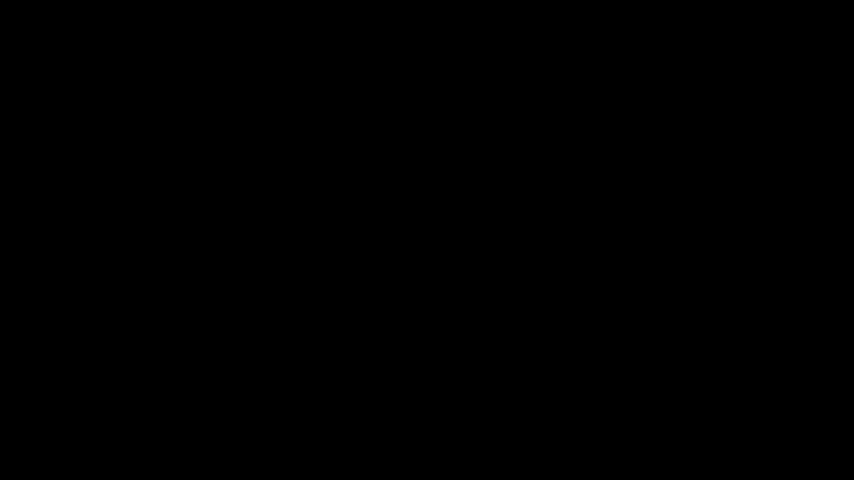

In [5]:
    
class Papajspin(Scene):
    n=0
    width=ValueTracker(1)
    height=ValueTracker(10)
    def pixelize(self):
        pixel_array = self.pixel_array
        w,h =  pixel_array.shape[0],  pixel_array.shape[1]
        W, H = int(self.width.get_value()), int(self.height.get_value())
        vg = VGroup(*[Dot(color=rgba_to_color(np.divide(pixel_array[int(x),int(y),:], 255))) for x in np.linspace(0,w,W, endpoint=False) for y in np.linspace(0,h,H, endpoint=False)])
        
        return vg.arrange_in_grid(buff=0)
    def construct(self):
        lore = ImageMobject('pig.png')
        self.pixel_array =lore.get_pixel_array()
        papaj = ImageMobject('papaj.png')
        vg = always_redraw(self.pixelize)
        self.add(vg)
        self.play(self.width.animate.set_value(20))
        self.play(self.height.animate.set_value(20))
        self.play(self.height.animate.set_value(50))
        self.play(self.height.animate.set_value(50))
#         a, b = np.split(self.pixel_array,2)
#         self.pixel_array = np.concatenate( (np.multiply(ImageMobject(a).set_color(WHITE).get_pixel_array(), a), np.multiply(ImageMobject(b).set_color(RED).get_pixel_array(), b)) )
#         self.add(vg)
        a, b = np.split(self.pixel_array,2)
        self.pixel_array = np.concatenate( (np.multiply(ImageMobject(a).set_color(RED).get_pixel_array(), a), np.multiply(ImageMobject(b).set_color(GREEN).get_pixel_array(), b)) )
        self.add(vg)
        self.play(self.width.animate.set_value(103), self.height.animate.set_value(103))
        self.play(self.width.animate.set_value(50), self.height.animate.set_value(1))
class Papajspin2(Scene):
    n=0
    def construct(self):
        lore = ImageMobject('papaj.png')
        pixel_array =lore.get_pixel_array()
#         pixel_array = (subsample(lore.get_pixel_array(),4))
#         papaj1 = lore.center()
# #         self.wait()
        g=Group(*[Dot(color=rgba_to_color([r/255,g/255,b/255,a/255])) for rgba in pixel_array for r,g,b,a in rgba]).arrange_in_grid( buff=0).scale_to_fit_height(8)
        self.add(g)

In [3]:
%%manim PolarPlaneExample
class PolarPlaneExample(Scene):
    def construct(self):
        ax = Axes(
            x_range=[-10, 10, 1],
            y_range=[-4, 4, 1],
            tips=False,
            axis_config={"include_numbers": False},
#             y_axis_config={"scaling": LogBase(custom_labels=True)},
        )

        # x_min must be > 0 because log is undefined at 0.
        graph = ax.plot(lambda x: np.sin(x), x_range=[-10, 10], use_smoothing=False)
        self.add(ax, graph)
        
        plane = NumberPlane(
           x_range=[-10, 10, 1],
            y_range=[-4, 4, 1],
            tips=False,
            axis_config={"include_numbers": False},
        ).add_coordinates()
        pplane = PolarPlane(
            azimuth_units="PI radians",
            size=6,
            azimuth_label_font_size=33.6,
            radius_config={"include_numbers": False},
#             background_line_style={"stroke_opacity": 0.4},
        ).add_coordinates()
        r = lambda theta: 4 #* np.sin(theta)
        graph2 = plane.plot_polar_graph(r, [0, 2 * PI])
        self.play( Transform(graph, graph2) )
        self.play(FadeIn( pplane ))
        
#         self.play(plane.animate.apply_function_to_submobject_positions(np.log))
        self.wait()

[02/26/22 14:08:04] INFO     Animation 0 : Using cached data (hash :     ]8;id=829310;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=169658;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             3163782288_3811959932_2784110674)

[02/26/22 14:08:11] INFO     Animation 1 : Using cached data (hash :     ]8;id=825900;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=771778;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             2201830969_4132514632_2179769959)

[02/26/22 14:08:12] INFO     Animation 2 : Partial movie file        ]8;id=334130;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=225006;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\PolarPlane                         
                             Example\1495979052_2478587744_191365395                         
                             4.mp4'

                    INFO     Combining to Movie file.                ]8;id=919847;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=667163;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#608\608]8;;\

                    INFO                                             ]8;id=619553;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=53119;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#729\729]8;;\
                             File ready at                                                   
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter                                  
                             notebooks\480p15\PolarPlaneExample.mp4'

                    INFO     Rendered PolarPlaneExample                          ]8;id=386491;file://D:\Python39\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=283323;file://D:\Python39\lib\site-packages\manim\scene\scene.py#237\237]8;;\
                             Played 3 animations

In [137]:
%%manim CurvePlot


    
import random
def get_m_mod_n_objects(circle,x=None,y=None):
    gradient_colors = [RED,YELLOW,BLUE]

    if x==None:
        x=random.random()
    if y==None:
        y = 30
    lines = VGroup()
    for i in range(y):
        start_point = circle.point_from_proportion((i%y)/y)
        end_point = circle.point_from_proportion(((i*x)%y)/y)
        line = Line(start_point,end_point).set_stroke(width=1)
        arc= ArcBetweenPoints(start=start_point, end=end_point).set_stroke(width=1)
        lines.add(line, arc)
        
    lines.set_color_by_gradient(*gradient_colors)
    return lines
class CurvePlot(Scene):
    
    t_offset=0
    def construct(self):
        c = Circle(radius=5)
        curves = VGroup()
        curves.add(Line(ORIGIN,ORIGIN, color=YELLOW_D))
        def get_curve(mob, dt,rate=.1):
            self.t_offset+=dt*rate
            
#             last_line = curves[-1]
#             A=last_line.get_end()
#             B=c.point_from_proportion(random.random())
#             new_line = Line(A,B, color=YELLOW_D)
#             curves.add(new_line)
            
            curves.become(get_m_mod_n_objects(c,self.t_offset))
        curves.add_updater(get_curve)
        self.add(curves)
#         self.wait()
        self.wait(1200)

        
#         def invert(z):
#             if all(z)!=0:
#                 return z**(-1)
#             else:
#                 return 0
# #         self.play(curves.animate.apply_function_to_submobject_positions(lambda pos: invert(pos)))
#         self.play( curves.animate.apply_function_to_submobject_positions(lambda pos: circInv2d(pos, c)) )
#         self.wait()c
        curves.remove_updater(get_curve)
        

[02/25/22 07:01:10] INFO     Animation 0 : Partial movie file        ]8;id=218395;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=511245;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\CurvePlot\                         
                             3163782288_4182026500_2281312306.mp4'

[07:01:10] INFO     Animation 0 : scene_file_writer.py:514
                    Partial movie                         
                    file written                          
                    in 'D:\Progra                         
                    mming\Python\                         
                    jupyter noteb                         
                    ooks\media\vi                         
                    deos\jupyter                          
                    notebooks\480                         
                    p15\partial_m                         
                    ovie_files\Cu                         
                    rvePlot\31637                         
                    82288_4182026                         
                    500_228131230                         
                    6.mp4'                                


[02/25/22 07:01:11] INFO     Combining to Movie file.                ]8;id=717590;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=605403;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#608\608]8;;\

[07:01:11] INFO     Combining to  scene_file_writer.py:608
                    Movie file.                           


[02/25/22 07:01:34] INFO                                             ]8;id=117640;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=883146;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#729\729]8;;\
                             File ready at                                                   
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter                                  
                             notebooks\480p15\CurvePlot.mp4'

[07:01:34] INFO                   scene_file_writer.py:729
                    File ready at                         
                    'D:\Programmi                         
                    ng\Python\jup                         
                    yter notebook                         
                    s\media\video                         
                    s\jupyter not                         
                    ebooks\480p15                         
                    \CurvePlot.mp                         
                    4'                                    
                                                          


                    INFO     The partial movie directory is full (>  ]8;id=824472;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=411701;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#700\700]8;;\
                             100 files). Therefore, manim has                                
                             removed the 2 oldest file(s). You can                           
                             change this behaviour by changing                               
                             max_files_cached in config.

           INFO     The partial   scene_file_writer.py:700
                    movie                                 
                    directory is                          
                    full (> 100                           
                    files).                               
                    Therefore,                            
                    manim has                             
                    removed the 2                         
                    oldest                                
                    file(s). You                          
                    can change                            
                    this                                  
                    behaviour by                          
                    changing max_                         
                    files_cached                          
                    in config.                            


                    INFO     Rendered CurvePlot                                  ]8;id=529541;file://D:\Python39\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=724443;file://D:\Python39\lib\site-packages\manim\scene\scene.py#237\237]8;;\
                             Played 1 animations

           INFO     Rendered CurvePlot        scene.py:237
                    Played 1 animations                   


In [35]:
%%manim SinePlot

class SinePlot(Scene):
    t_offset=0
    def construct(self):
        ax = Axes(
            x_range=[-3, 3, 1],
            y_range=[-1, 1, 1],
            tips=False,
            axis_config={"include_numbers": True},
#             y_axis_config={"scaling": LogBase(custom_labels=True)},
        )

        # x_min must be > 0 because log is undefined at 0.
#         graph = ax.plot(lambda x: x ** 2, x_range=[0.001, 10], use_smoothing=False)
        graph = ax.plot(lambda x: np.sin(x), x_range=[-PI, PI], use_smoothing=False)
#         self.play(Create(ax), Write(graph))
        self.add(ax, graph)
        self.wait()
        dot = Dot(radius=0.08, color=YELLOW).move_to(graph.point_from_proportion(0))
        def go_around_sine(mob, dt, rate = 0.25):
            self.t_offset += (dt * rate)
            # print(self.t_offset)
            mob.move_to(graph.point_from_proportion(self.t_offset % 1))
        dot.add_updater(go_around_sine)
        self.add(dot)
        self.wait(4)

        dot.remove_updater(go_around_sine)
        

[02/24/22 14:39:38] INFO     Animation 0 : Using cached data (hash :     ]8;id=997827;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=352296;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             3163782288_1515588106_1256473225)

[02/24/22 14:39:41] INFO     Animation 1 : Partial movie file        ]8;id=102961;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=147163;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\PlottingEx                         
                             ample\2201830969_1676967760_792389506.m                         
                             p4'

                    INFO     Combining to Movie file.                ]8;id=232031;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=124328;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#608\608]8;;\

[02/24/22 14:39:42] INFO                                             ]8;id=658259;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=149080;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#729\729]8;;\
                             File ready at                                                   
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter                                  
                             notebooks\480p15\PlottingExample.mp4'

                    INFO     Rendered PlottingExample                            ]8;id=229866;file://D:\Python39\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=373527;file://D:\Python39\lib\site-packages\manim\scene\scene.py#237\237]8;;\
                             Played 2 animations

In [25]:
class Grid(Scene):
    def construct(self):
        plane = NumberPlane(
            x_range = (0, 7),
            y_range = (0, 5),
            x_length = 7,
            axis_config={"include_numbers": True},
        )
        plane.center()
        line_graph = plane.plot_line_graph(
            x_values = [0, 1.5, 2, 2.8, 4, 6.25],
            y_values = [1, 3, 2.25, 4, 2.5, 1.75],
            line_color=GOLD_E,
            vertex_dot_style=dict(stroke_width=3,  fill_color=PURPLE),
            stroke_width = 4,
        )
        self.add(plane, line_graph)
    def func_to_graph(self,x):
        return np.cos(x)

    def func_to_graph2(self,x):
        return np.sin(x)

[02/24/22 14:13:30] INFO     Animation 0 : Using cached data (hash :     ]8;id=832478;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=675137;file://D:\Python39\lib\site-packages\manim\renderer\cairo_renderer.py#74\74]8;;\
                             3163782288_1847145062_1275765806)

                    INFO     Animation 1 : Partial movie file        ]8;id=198785;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=219332;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#514\514]8;;\
                             written in                                                      
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter notebook                         
                             s\480p15\partial_movie_files\LogScaling                         
                             Example\2201830969_398514950_2514178822                         
                             .mp4'

                    INFO     Combining to Movie file.                ]8;id=867381;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=226939;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#608\608]8;;\

                    INFO                                             ]8;id=327897;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=213715;file://D:\Python39\lib\site-packages\manim\scene\scene_file_writer.py#729\729]8;;\
                             File ready at                                                   
                             'D:\Programming\Python\jupyter                                  
                             notebooks\media\videos\jupyter                                  
                             notebooks\480p15\LogScalingExample.mp4'

                    INFO     Rendered LogScalingExample                          ]8;id=579495;file://D:\Python39\lib\site-packages\manim\scene\scene.py\scene.py]8;;\:]8;id=966192;file://D:\Python39\lib\site-packages\manim\scene\scene.py#237\237]8;;\
                             Played 2 animations